In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [4]:
income= pd.read_excel('incomeds.xlsx')
income.head()

,Name,Age,Income
0,ABDUL,23,95978
1,HASSAN,25,79978
2,AISH,67,173372
3,UJJWAL,78,105905
4,SIYAD,33,138288


In [5]:
income.isnull().sum()

Name       0
Age        0
Income     0
dtype: int64

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler #To normalise the data because if there is a large distance between the mean and the data points use this
%matplotlib inline

In [16]:
#To remove whitespace from column names
income.columns.str.strip()

Index(['Name', 'Age', 'Income'], dtype='object')

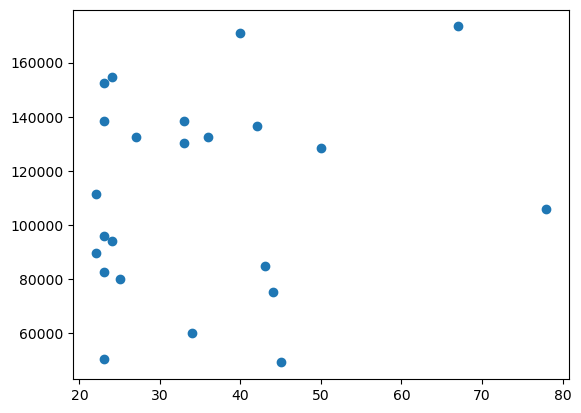

In [18]:
plt.scatter(income.Age,income['Income ']) #first one you can join it with '.' but beyond that it is necessary to put []

Text(0, 0.5, 'Income')

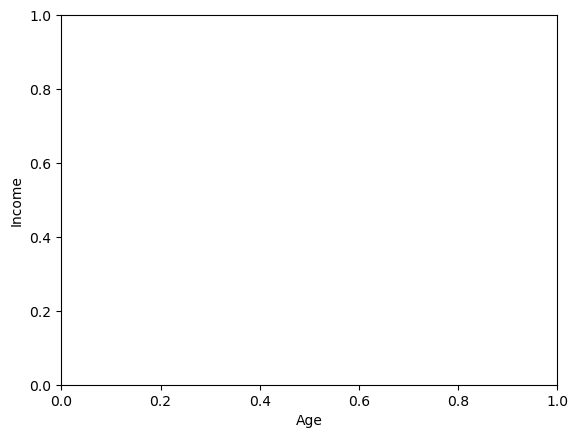

In [13]:
plt.xlabel('Age')
plt.ylabel('Income')

In [21]:
km= KMeans(n_clusters=3)
predict= km.fit_predict(income[['Age','Income ']])
predict

C:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0,
       1])

In [22]:
#Create a new column in the dataframe
income['clusters']= predict
income.head()

,Name,Age,Income,clusters
0,ABDUL,23,95978,0
1,HASSAN,25,79978,0
2,AISH,67,173372,1
3,UJJWAL,78,105905,0
4,SIYAD,33,138288,1


In [23]:
km.cluster_centers_

array([[3.37777778e+01, 9.11211111e+04],
       [3.61818182e+01, 1.44410182e+05],
       [3.40000000e+01, 5.32386667e+04]])

In [25]:
df0= income[income.clusters==0]
df1= income[income.clusters==1]
df2= income[income.clusters==2]
#This .clusters is the column you just created above storing the clusters 

Text(0, 0.5, 'Income')

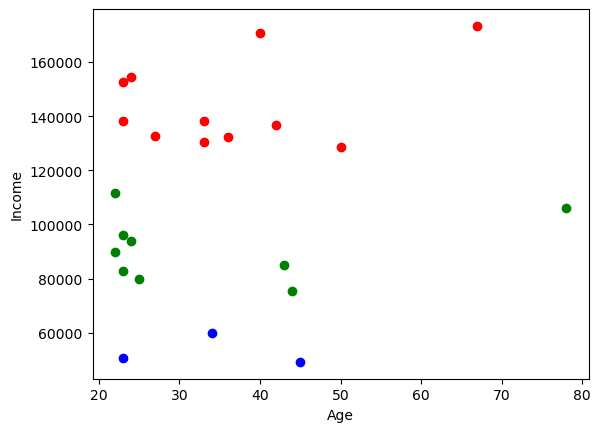

In [26]:
plt.scatter(df0.Age,df0['Income '], color='green')
plt.scatter(df1.Age,df1['Income '], color='red')
plt.scatter(df2.Age, df2['Income '], color='blue')
plt.xlabel('Age')
plt.ylabel('Income')

In [27]:
#Creating an elbow diagram
sse= [] #Sum of Squared error
k_range= range(1,10)
for k in k_range:
    km= KMeans(n_clusters=k)
    km.fit(income[['Age','Income ']])
    sse.append(km.inertia_)

C:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kalya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

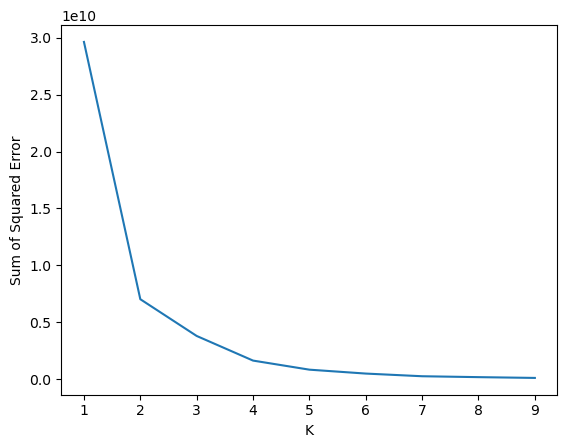

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)